# Загрузка библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np

# Загрузка данных

In [ ]:
# подключим диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загрузим данные
dataM = pd.read_excel('/content/drive/MyDrive/tgu/region roles (26.05.22).xlsx')# данные за май
dataJ = pd.read_excel('/content/drive/MyDrive/tgu/result roles (16.06.2022).xlsx')# данные за июнь

# 1. Изучение датасета

## Обзор данных

In [ ]:
dataM.info() # характеристика майского датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   69656 non-null  bool   
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  69656 non-null  bool   
 6   response_letter_required  69656 non-null  bool   
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              69656 non-null  object 
 14  create

In [ ]:
dataJ.info() # характеристика июньского датасета

***Замечание:*** Майские данные представлены 69656 записями, июньские - 76382. Примерно половина  записей в обоих датасетах имеет информацию о предлагаемой зарплате. Структура датасетов слегка отличаются,для объединения данных, приведем датасеты к общей структуре.

In [ ]:
dataM2 = dataM.drop(columns=['address','response_url','sort_point_distance','contacts','immediate_redirect_url'])

In [ ]:
dataJ2 = dataJ.drop(columns=['Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48','Unnamed: 49','Unnamed: 50'])

In [ ]:
dataM2.info()

In [ ]:
dataJ2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76382 entries, 0 to 76381
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                76382 non-null  int64 
 1   id                        76382 non-null  int64 
 2   premium                   76382 non-null  bool  
 3   name                      76382 non-null  object
 4   department                4902 non-null   object
 5   has_test                  76380 non-null  object
 6   response_letter_required  76382 non-null  object
 7   area                      76381 non-null  object
 8   salary                    40874 non-null  object
 9   type                      76379 non-null  object
 10  published_at              76380 non-null  object
 11  created_at                76381 non-null  object
 12  archived                  76380 non-null  object
 13  insider_interview         570 non-null    object
 14  url                   

Добавим в датасеты столбец даты выгрузки

In [ ]:
dataM2['data'] = '26.05.22'

In [ ]:
dataJ2['data'] = '16.06.2022'

## Объединение данных

Объединим данные двух датасетов в один

In [ ]:
dataAll = pd.concat([dataM2,dataJ2])

In [ ]:
dataAll.info()# характеристика обобщенного датасета

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146038 entries, 0 to 76381
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                146038 non-null  int64 
 1   id                        146038 non-null  int64 
 2   premium                   146038 non-null  bool  
 3   name                      146038 non-null  object
 4   department                10165 non-null   object
 5   has_test                  146036 non-null  object
 6   response_letter_required  146038 non-null  object
 7   area                      146037 non-null  object
 8   salary                    78464 non-null   object
 9   type                      146035 non-null  object
 10  published_at              146036 non-null  object
 11  created_at                146037 non-null  object
 12  archived                  146036 non-null  object
 13  insider_interview         1092 non-null    object
 14  url  

***Замечание:*** в объединенном датасете возможны повторяющиеся строки, удалим дубликаты, содержащие одинаковые данные в сключевых для анализа столбцах  *'name', 'department','response_letter_required','salary','area','key_skills','specializations','region'*

## Удаление дубликатов

In [ ]:
dataAllWD = dataAll.drop_duplicates(keep='last',subset=['name', 'department','response_letter_required','salary','area','key_skills','specializations','region'])

In [ ]:
dataAllWD.info() # взглянем, что получилось. Из  146038 строк осталось 144026, удалили больше 2000 дубликатов.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144026 entries, 0 to 76381
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                144026 non-null  int64 
 1   id                        144026 non-null  int64 
 2   premium                   144026 non-null  bool  
 3   name                      144026 non-null  object
 4   department                9999 non-null    object
 5   has_test                  144024 non-null  object
 6   response_letter_required  144026 non-null  object
 7   area                      144025 non-null  object
 8   salary                    77575 non-null   object
 9   type                      144023 non-null  object
 10  published_at              144024 non-null  object
 11  created_at                144025 non-null  object
 12  archived                  144024 non-null  object
 13  insider_interview         1089 non-null    object
 14  url  

***Замечание:*** Получили датасет без дубликатов, удалим столбцы со старыми индексами - эта информация не отвечает целям исследования

In [ ]:
dataAllWD = dataAllWD.drop(columns=['Unnamed: 0','id'])

In [ ]:
dataAllWD.describe(include=['O']) # Взглянем на описание датасета

,name,department,has_test,response_letter_required,area,salary,type,published_at,created_at,archived,...,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,data
count,144026,9999,144024,144026,144025,77575,144023,144024,144025,144024,...,144025,144026,144026,144025,144026,144026,144025,144026,144026,144026
unique,50380,361,6,6,1395,5720,4,117906,117907,5,...,5,5,4,5,101804,287,76223,2343,348,2
top,Системный администратор,"{'id': 'gpn-39305-HOLD', 'name': 'ПАО «Газпром...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 50000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",2022-03-29T09:54:23+0300,2022-03-29T09:54:23+0300,False,...,[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'between1And3', 'name': 'От 1 года до 3...",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Москва,16.06.2022
freq,3414,1040,73717,74350,41032,2385,143771,51,51,75380,...,143239,140554,141812,69891,332,72854,23026,29357,40968,75384


***Кратко о датасете:*** вакансий представлено порядка 144 тыс. Из них уникальных 50 тыс., наиболее распространенная  - "Системный администратор". Макмимальное количество ваканисий предоставлено Газпромом. Регионов в датасете представлено 348, максимальное число вакансий по регионам в г.Москва. Наиболее распространенная специализация - программирование. Пустыми списками в более чем 140тыс.строк представлены столбцы working_days,	working_time_intervals,	working_time_modes - верояно, от них тоже можно избавится. Примечательно, что зарплата указана лишь половине преставленных вакансий,это печально, ведь одна из целей анализа - выявить не только самые популярное, но и наиболее оплачиваемые IT-навыки.

## Визуализация пропусков в данных

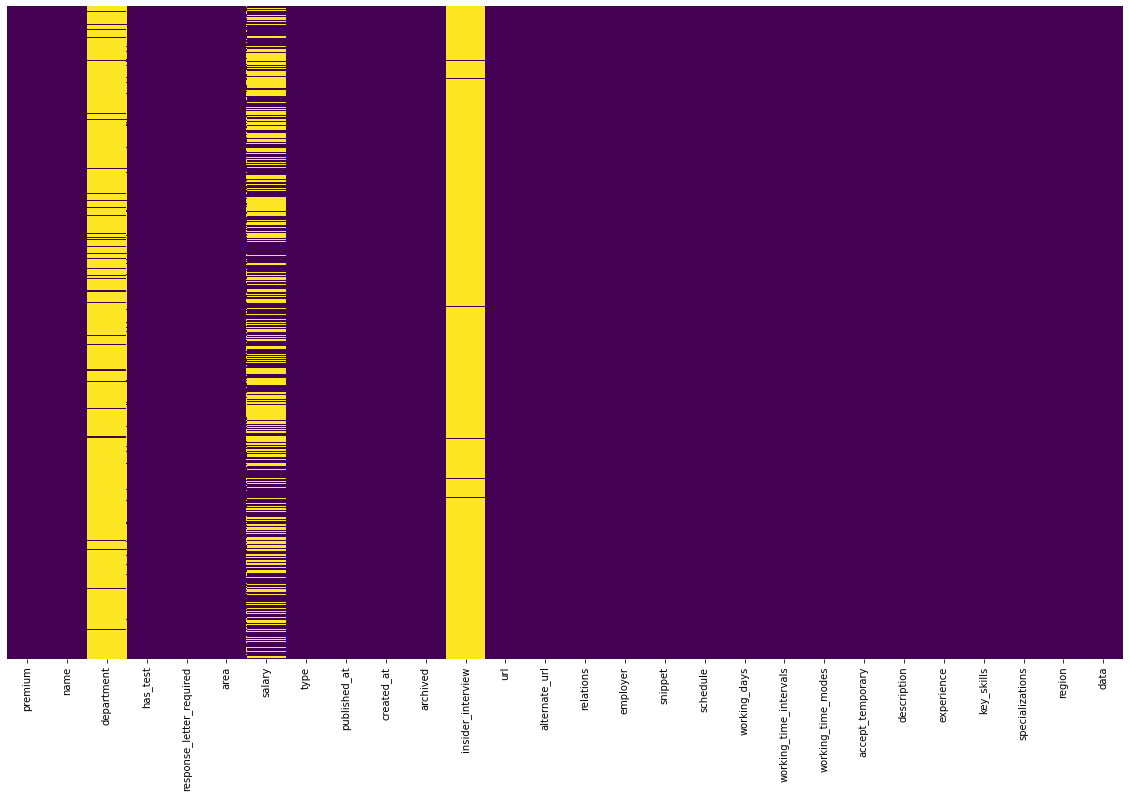

In [ ]:
fig, ax = plt.subplots(figsize=(20,12)) # Создаем область под график
sns_heatmap = sns.heatmap(dataAllWD.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем прпуски
plt.show()

In [ ]:
# удалим пустые столбцы 'department','insider_interview'
dataAllWD = dataAllWD.drop(columns = ['department','insider_interview'])

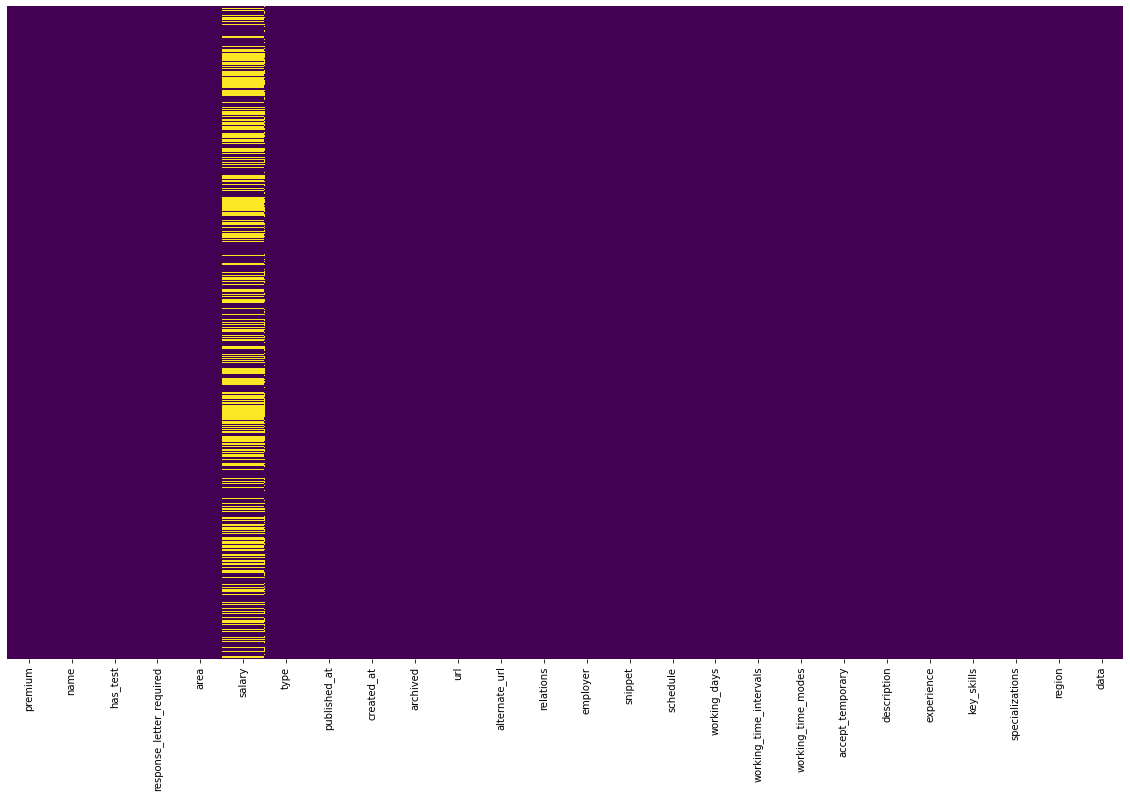

In [ ]:
fig, ax = plt.subplots(figsize=(20,12)) # Создаем область под график
sns_heatmap = sns.heatmap(dataAllWD.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем прпуски
plt.show()

In [ ]:
# сохраним полученный датасет, чтоб в дальнейшем не проводить все предыдущие операции
dataAllWD.to_csv('/content/drive/MyDrive/tgu/общий_без_дубликатов.csv')

In [ ]:
# создадим датасет, где по всем вакансиям есть зарплата
dataAllWDS = dataAllWD[dataAllWD['salary'].notnull()]

In [ ]:
# сохраним полученный датасет, чтоб в дальнейшем не проводить все предыдущие операции
dataAllWDS.to_csv('/content/drive/MyDrive/tgu/общий_без_дубликатов_с_зарплатой.csv')

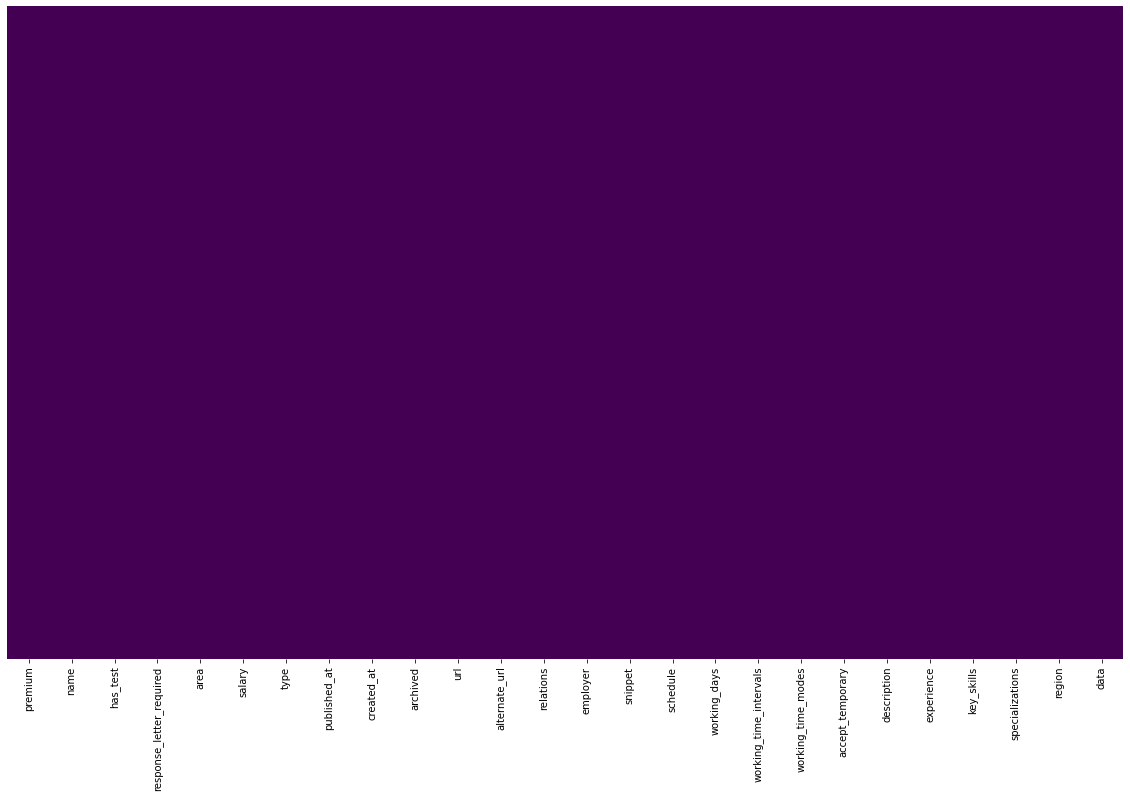

In [ ]:
fig, ax = plt.subplots(figsize=(20,12)) # Создаем область под график
sns_heatmap = sns.heatmap(dataAllWDS.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем прпуски
plt.show()

In [ ]:
dataAllWDS.describe(include=['O'])

,name,has_test,response_letter_required,area,salary,type,published_at,created_at,archived,url,...,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,data
count,77575,77573,77575,77574,77575,77572,77573,77574,77573,77573,...,77574,77575,77575,77574,77575,77575,77575,77575,77575,77575
unique,26026,6,6,1200,5720,4,65430,65431,5,66902,...,5,5,4,5,55547,208,42590,1412,273,2
top,Системный администратор,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 50000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",2022-03-29T09:54:23+0300,2022-03-29T09:54:23+0300,False,https://api.hh.ru/vacancies/54653519?host=hh.ru,...,[],[],[],False,<p>Каждый день сервисами Яндекса пользуются ми...,"{'id': 'between1And3', 'name': 'От 1 года до 3...",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Москва,16.06.2022
freq,2471,39811,39755,16201,2385,77449,51,51,40399,2,...,77075,74974,76049,36269,196,38184,13009,14796,16161,40403


***Кратко о  получившемся датасете:*** вакансии сократились вдвое, осталось порядка 77 тыс. Из них уникальных 26 тыс., наиболее распространенная по-прежнему "Системный администратор". Большинство вакансий н требуют входного теста и  имеют статус "открытая" Число уникальных регионов снизилось до 273,г.Москва по-прежнему лидирует. Наиболее распространенная специализация также программирование (присутствует в 14796 строках). Пустыми списками в более чем 13тыс.строк представлен столбец с ключевыми навыками - верояно, от этих строк тоже придется избавится в последующем, т.к. этот столбец один из ключевых в исследовании.

# 2. Приводим значения зарплаты к числовому типу.

In [ ]:
# Рассмотрим отдельно взятое значение в столбце с зарплатой
dataAllWDS['salary'][1] # структура столбца предствляет собой строку со словарем внутри

"{'from': 25000, 'to': 50000, 'currency': 'RUR', 'gross': True}"

In [ ]:
# Создадим функцию, которая вытаскивает словарь из строки
def to_dict(stroka):
  if type(stroka)== str:
    try:
      return eval(stroka) # возвращаем значение - словарь, если возможно
    except:
      print("___" + stroka)# посмотрим, какие строки выдают ошибки
      return {} # в случае возникновения исключения вернем пустой словарь
  else:  print("___" + stroka)# посмотрим, какие строки выдают ошибки

In [ ]:
dataAllWDS['salary_dict'] = dataAllWDS['salary'].apply(to_dict) #создадим столбец для словаря

___ ТОРО)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataAllWDS['salary_dict'][1] # теперь в столбце лежит словарь

{'currency': 'RUR', 'from': 25000, 'gross': True, 'to': 50000}

In [ ]:
dataAllWDS[dataAllWDS['salary'].str.contains('ТОРО')]# эта строка выдала ошибку, взглянем почему

,premium,name,has_test,response_letter_required,area,salary,type,published_at,created_at,archived,...,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,data,salary_dict
17754,False,Старший/Ведущий консультант SAP (FI/CO,AA,MM/SD,BW,ТОРО),NaN,"{'from': 200000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",NaN,...,"{'id': '5688390', 'name': 'Чернышова Наталья',...",{'requirement': 'Опыт работы консультантом SAP...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],True,16.06.2022,{}


Видно, что данные о зарплате есть, но лежат не в том столбце, данные сдвинуты на два столбца вправо. Исправим ситуацию.

In [ ]:
# обратимся к строке под номером 17754
dataAllWDS[17754]

KeyError: ignored

Результат - ошибка. думаю после всех манипуляций, нужно переиндексировать датасет.

In [ ]:
import numpy as np
dataAllWDS.index = np.arange(len(dataAllWDS))

In [ ]:
dataAllWDS[dataAllWDS['salary'].str.contains('ТОРО')]# какой индекс строки теперь?

,premium,name,has_test,response_letter_required,area,salary,type,published_at,created_at,archived,...,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,data,salary_dict
46713,False,Старший/Ведущий консультант SAP (FI/CO,AA,MM/SD,BW,ТОРО),NaN,"{'from': 200000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",NaN,...,"{'id': '5688390', 'name': 'Чернышова Наталья',...",{'requirement': 'Опыт работы консультантом SAP...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],True,16.06.2022,{}


In [ ]:
# Подвинем значения на нужное место
sal = dataAllWDS.iloc[46713].published_at
tp =dataAllWDS.iloc[46713].created_at
dataAllWDS.iloc[46713,5] = sal
dataAllWDS.iloc[46713,6] = tp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
dataAllWDS.iloc[46713]# убедимся, что зарплата на месте

premium                                                                 False
name                                   Старший/Ведущий консультант SAP (FI/CO
has_test                                                                   AA
response_letter_required                                                MM/SD
area                                                                       BW
salary                      {'from': 200000, 'to': None, 'currency': 'RUR'...
type                                       {'id': 'open', 'name': 'Открытая'}
published_at                {'from': 200000, 'to': None, 'currency': 'RUR'...
created_at                                 {'id': 'open', 'name': 'Открытая'}
archived                                                                  NaN
url                                                  2022-04-05T11:25:24+0300
alternate_url                                        2022-04-05T11:25:24+0300
relations                                                       

In [ ]:
dataAllWDS['salary_dict'] = dataAllWDS['salary'].apply(to_dict) # обновим столбец

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
selected_words_sal = ['from', 'to', 'currency', 'gross'] # список ключей словаря с зарпатой

In [ ]:
# Создадим поле для каждого атрибута из словаря
for this_word in selected_words_sal :
    dataAllWDS['salary_'+this_word] = dataAllWDS['salary_dict'].apply(lambda dict: dict.get(this_word, 0))

AttributeError: ignored

In [ ]:
# Где-то в столбце  'salary_dict' затечалось булево значение, смотрим какое
for dct in dataAllWDS['salary_dict']:
  if type(dct)==bool: print('bool',dct)

bool False


In [ ]:
# Ищем строки
dataAllWDS[dataAllWDS.salary_dict == False]

,premium,name,has_test,response_letter_required,area,salary,type,published_at,created_at,archived,...,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,data,salary_dict
58128,False,Менеджер по недвижимости(ЖК Столичный,ЖК Привилегия,ЖК Паруса,NaN,False,False,"{'city': 'Казань', 'street': 'Спартаковская ул...",NaN,NaN,...,"{'name': 'Хусаинова Аделя', 'email': 'adelya.h...","{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,<p>В агентстве недвижимости «ФЛЭТ» открыты вак...,"{'id': 'noExperience', 'name': 'Нет опыта'}",16.06.2022,False


In [ ]:
# Удалим эту строку
dataAllWDS = dataAllWDS.drop(dataAllWDS.index[58128])

In [ ]:
# Переиндексируем после удаления строки
dataAllWDS.index = np.arange(len(dataAllWDS))

In [ ]:
# Повторим создание столбцов
for this_word in selected_words_sal :
    dataAllWDS['salary_'+this_word] = dataAllWDS['salary_dict'].apply(lambda dict: dict.get(this_word, 0))

In [ ]:
# Сохраним датасет
dataAllWDS.to_csv('/content/drive/MyDrive/tgu/общий_без_дубликатов_с_зарплатой_float.csv')

In [ ]:
# Загрузим датасет
#dataAllWDS = pd.read_csv('/content/drive/MyDrive/tgu/общий_без_дубликатов_с_зарплатой_float.csv')

In [ ]:
dataAllWDS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77574 entries, 0 to 77573
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   premium                   77574 non-null  bool   
 1   name                      77574 non-null  object 
 2   has_test                  77572 non-null  object 
 3   response_letter_required  77574 non-null  object 
 4   area                      77574 non-null  object 
 5   salary                    77574 non-null  object 
 6   type                      77572 non-null  object 
 7   published_at              77572 non-null  object 
 8   created_at                77574 non-null  object 
 9   archived                  77573 non-null  object 
 10  url                       77572 non-null  object 
 11  alternate_url             77574 non-null  object 
 12  relations                 77574 non-null  object 
 13  employer                  77574 non-null  object 
 14  snippe

In [ ]:
dataAllWDS.head(2)


,premium,name,has_test,response_letter_required,area,salary,type,published_at,created_at,archived,...,experience,key_skills,specializations,region,data,salary_dict,salary_from,salary_to,salary_currency,salary_gross
0,False,Тестировщик.Net,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",2022-04-28T17:36:03+0300,2022-04-28T17:36:03+0300,False,...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,26.05.22,"{'from': 25000, 'to': 50000, 'currency': 'RUR'...",25000.0,50000.0,RUR,True
1,False,Ведущий Специалист по информационным технологиям,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",2022-05-23T07:46:16+0300,2022-05-23T07:46:16+0300,False,...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,26.05.22,"{'from': 26000, 'to': None, 'currency': 'RUR',...",26000.0,NaN,RUR,True


**Теперь данные о зарплате** присутствуют в столбцах *salary_from salary_to*, значение в них имеет тип float64, можно проводить анализ числовых данных.

# 3. Выбор столбцов для анализа, определение тактики.

Числовые данные касаются уровня предполагаемой зарплаты и отражены в датасете dataAllWDS. Для нализа можно выбрать столбцы   'salary_from','salary_to'. По этим столбцам можно получить описательные статистики, определить возможные выбросы и избвиться от них.  
Среди категориальных данных можно определить частотность вакансий 'name', навыков 'key_skills',специалихзаций 'specializations' выделить топ-10(25?) самых востребованных, выявить наличие взаимосвязей в этих столбцах, а также их связь с уровнем зарплаты.
Также можно рассмотреть столбец с требуемым опытом работы 'experience', проанализировать его связь с другими выбранными столбцами. Рассмотрение данных в столбце 'region' позволит ответить на вопрос, какие специалисты наиболее востребованы по регионам, что позволит выработать грамотную маркетинговую политику.

# 4. Анализ числовых данных.

## Неграфический анализ

In [ ]:
salaryStat = dataAllWDS.describe()
salaryStat.salary_from = salaryStat.salary_from.astype(int)
salaryStat.salary_to = salaryStat.salary_to.astype(int)
salaryStat

,salary_from,salary_to
count,70405,41061
mean,76053,130382
std,64926,165322
min,0,0
25%,38500,50000
50%,60000,90000
75%,100000,150000
max,2000000,10000000


**Исследуя описательные статитстики**, можно отметить, почти половина записей не имеет верхнего порога зарплаты. Средний уровеь нижнего порога составляет порядка 76000 ркблей. 50% вакансий предполагают нижний уровень зарплаты до 60000 рублей. Минимальные и максимальные значения столбцов явно характеризуют выбросы в выборке. Рассчитаем 2 и 99 процентили и избавимся от строк, лежащими за их границами.

In [ ]:
perc99 = dataAllWDS.salary_from.quantile(0.99)
perc2 = dataAllWDS.salary_from.quantile(0.02)

In [ ]:
print(f'Второй процентиль составляет {perc2:.0f}руб., а девяносто девятый - {perc99:.0f}руб.')

Второй процентиль составляет 13000руб., а девяносто девятый - 300000руб.


In [ ]:
dataAllWDS99 = dataAllWDS[dataAllWDS['salary_from'] <=300000]
dataAllWDS299 = dataAllWDS99[dataAllWDS['salary_from']> 13000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
# Сохраним датасет
dataAllWDS299.to_csv('/content/drive/MyDrive/tgu/общий_без_дубликатов_с_зарплатой_float_299.csv')

In [ ]:
salaryStat299 = dataAllWDS299.describe()
salaryStat299.salary_from = salaryStat299.salary_from.astype(int)
salaryStat299.salary_to = salaryStat299.salary_to.astype(int)
salaryStat299

,salary_from,salary_to
count,67965,32693
mean,74470,128116
std,52708,138590
min,13160,13890
25%,40000,50000
50%,60000,90000
75%,100000,150000
max,300000,10000000


In [ ]:
SalaryFromMediana = dataAllWDS299.salary_from.median()
SalaryToMediana = dataAllWDS299.salary_to.median()

In [ ]:
print(f'Медианные значения предлагаемой зарплаты ОТ {SalaryFromMediana} ДО {SalaryToMediana}')

Медианные значения предлагаемой зарплаты ОТ 60000.0 ДО 90000.0


### Предварительные выводы

Раброс между максимальными и минимальными значениями в столбцах очень велик, средние значения значительно преаышают медианные, что говорит преобладкнии выбросов в последнем квартиле. Проведем графический анализ для достоверности этих выводов.

## Графический анализ

In [ ]:
# Установим формат графиков
plt.style.use('seaborn')
params = {
          'axes.titlesize': 15,
          'xtick.labelsize': 12,
          'axes.labelsize': 14
          }
plt.rcParams.update(params)

In [ ]:
salaryFrom = dataAllWDS299.salary_from.dropna().astype(int)
salaryTo =dataAllWDS299.salary_to.dropna().astype(int)

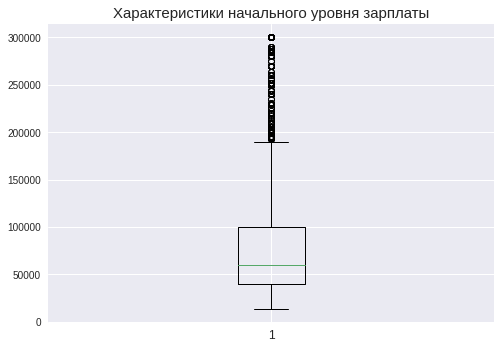

In [ ]:
plt.boxplot(salaryFrom)
plt.title('Характеристики нижнего уровня зарплаты')
plt.show()

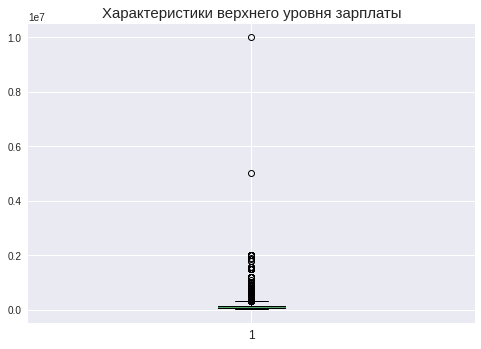

In [ ]:
plt.boxplot(salaryTo)
plt.title('Характеристики верхнего уровня зарплаты')
plt.show()

График ненаглядный, возьмем значения ниже 400000, чтоб избавиться от зашкаливающих выбросов

In [ ]:
salaryTo2 = salaryTo[salaryTo<400000]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'руб.')

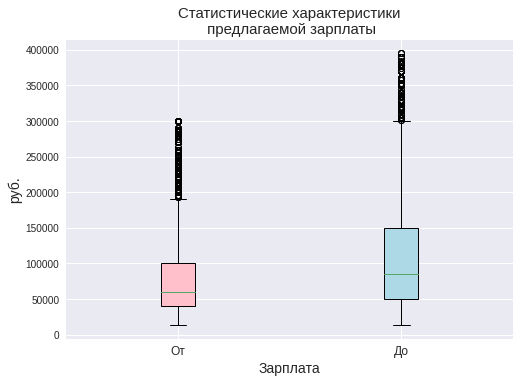

In [ ]:
# Построим совместный график
ig, ax = plt.subplots()
ax.set_title('Статистические характеристики\n предлагаемой зарплаты')
bplot = ax.boxplot([salaryFrom,salaryTo2],labels =['От','До'],patch_artist=True,)

colors = ['pink', 'lightblue']
for patch, color in zip(bplot['boxes'], colors):
  patch.set_facecolor(color)
ax.yaxis.grid(True)
ax.set_xlabel('Зарплата')
ax.set_ylabel('руб.')

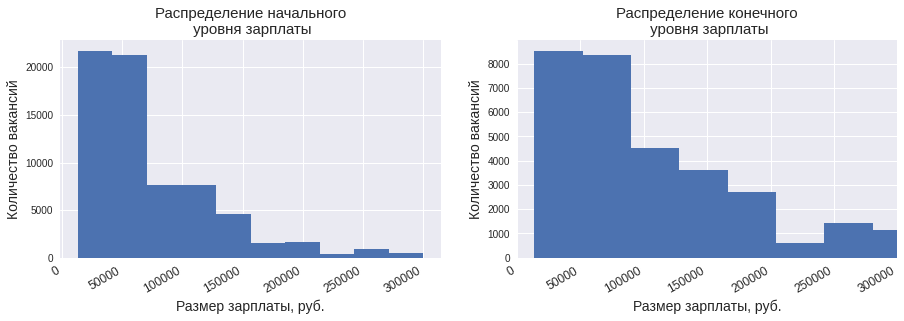

In [ ]:
#Построим графики
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
ax1.hist(salaryFrom)
ax1.set_title('Распределение начального\n уровня зарплаты')
ax1.set_xlabel('Размер зарплаты, руб.')

ax1.set_ylabel('Количество вакансий')

ax2.hist(salaryTo2)
ax2.set_title('Распределение конечного\n уровня зарплаты')
ax2.set_xlabel('Размер зарплаты, руб.')
ax2.set_xlim((0,300000))
ax2.set_ylabel('Количество вакансий')

for ax in (ax1, ax2):
  for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

In [ ]:
# Расчитаем разницу между верхним и нижним уровнями зарплаты, т.е. возможный рост
salaryRost= dataAllWDS299.salary_to.fillna(dataAllWDS299.salary_from).astype(int) - dataAllWDS299.salary_from.fillna(0).astype(int)

In [ ]:
# Посмотрим, какие значения роста получили
SR = salaryRost.value_counts()
SR

0        39021
20000     3040
10000     2633
50000     2039
30000     2028
         ...  
10947        1
11884        1
16166        1
12650        1
17300        1
Length: 654, dtype: int64

In [ ]:
# Отсортируем по уровню роста зарплаты, возьмем те группы, где количество значений выше 500
SRSort = SR[SR>500].sort_index()
SRSort

0         39021
5000       1978
10000      2633
15000      1368
20000      3040
25000       718
30000      2028
40000      1766
50000      2039
60000      1016
70000       896
80000       731
100000     1372
150000      691
dtype: int64

In [ ]:
# Отберем записи с ненулевым значением роста
SRSort[1:]

5000      1978
10000     2633
15000     1368
20000     3040
25000      718
30000     2028
40000     1766
50000     2039
60000     1016
70000      896
80000      731
100000    1372
150000     691
dtype: int64

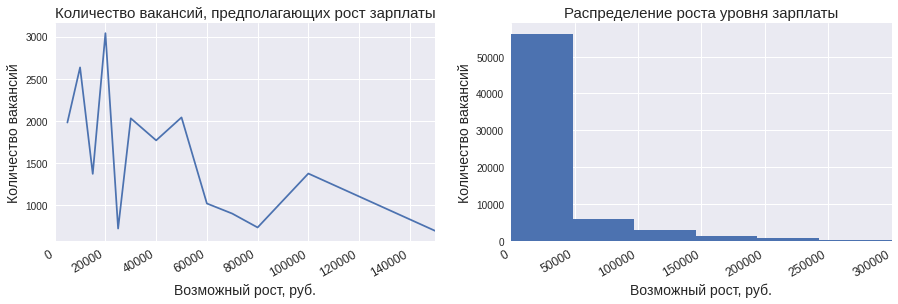

In [ ]:
#Построим графики
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
ax1.plot(SRSort[1:].index,SRSort[1:].values)
ax1.set_title('Количество вакансий, предполагающих рост зарплаты')
ax1.set_xlabel('Возможный рост, руб.')
ax1.set_xlim((0,150000))
ax1.set_ylabel('Количество вакансий')

ax2.hist(salaryRost, bins = 200)
ax2.set_title('Распределение роста уровня зарплаты')
ax2.set_xlabel('Возможный рост, руб.')
ax2.set_xlim((0,300000))
ax2.set_ylabel('Количество вакансий')

for ax in (ax1, ax2):
  for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

### Предварительные выводы

Распределение зарплат, как в предложениях "От", так и в предложениях "До" тяготеют в сторону минимальных значений. Нижний порог предлагаемой зарплаты не превышает 75т.руб. более чем в 40000 вакансий из 67000. Зарплата от 190т.руб. согласно графику "Статистические характеристики предлагаемой зарплаты"  явллеся статистическим выбросом (в нашем датасете таких записей в пределах 5000). Верхний порог предполагаемой зарплаты распределен более плавно, в нем не так много выбросов (более 300000р. примерно 1500строк). Зарплату до 50000 предлагают порядка 8500 вакансий, а значит в 20000-8500 = 11500тыс. самых низкооплачиваемых уже вакансий заложен рост заработной платы. В целом же по датасету более 55000 вакансий предполагают повышение уровня зарплаты до 50000руб., а почти 500 вакансий имеет разброс в уровне зарплаты от 50000 до 100000рублей. Заказчик должен понимать, что основная масса его потенциальных клиентов имеет доход значительно ниже 100т.руб. и желание его увеличить. Задача анализа  - выявить факторы, которые этому способствуют.

# 5. Анализ категориальных данных

## Обработка выбранных категориальных столбцов

### Обработка поля "experience"

In [ ]:
dataAllWDS299['experience'][0] # Столбец с опытом содержит строку со словарем

"{'id': 'between1And3', 'name': 'От 1 года до 3 лет'}"

In [ ]:
# Создадим функцию для захвата только значения 'name'
def get_experience(experience):
  if experience[0]=='{':
    try:
      return experience.split(':')[2].strip().replace('}','').replace('\'','')
    except:
      return 'Не указано'
  else: return 'Не указано'

In [ ]:
# добавим в датасет столбец с нименование требуемого опыта
dataAllWDS299['experience_shot'] = dataAllWDS299['experience'].apply(get_experience)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataAllWDS299['experience_shot'][0] # Что получили

'От 1 года до 3 лет'

In [ ]:
# Сохраним датасет с новым столбцом
dataAllWDS299.to_csv('/content/drive/MyDrive/tgu/общий_без_дубликатов_с_зарплатой_float_299_опыт.csv')

In [ ]:
#dataAllWDS299 = pd.read_csv('/content/drive/MyDrive/tgu/общий_без_дубликатов_с_зарплатой_float_299_опыт.csv')

### Обработка поля "name"

In [ ]:
# Сохраним в переменную уникальные значения вакансий
vac = dataAllWDS299['name'].unique()

In [ ]:
len(vac) # Количество наименований вакансий

22817

In [ ]:
vac[300:500] # Посмотрим, какие вакансии всттречаются

array(['Дизайнер в интернет-проект', 'Junior product manager',
       'Продукт-менеджер',
       'Специалист по внедрению (Младший менеджер продукта)',
       'Продуктовый маркетолог', 'Проектный менеджер', 'Project manager',
       'Менеджер проектов (контактный центр)', 'CRM-маркетолог (Senior)',
       'Интернет-маркетолог со знанием английского',
       'Руководитель проектов', 'Менеджер по коммерческой недвижимости',
       'Менеджер по аренде жилой недвижимости',
       'Менеджер п\u200eо поиску коммерческой недвижимости (Рязанская область)',
       'Агент по жилой недвижимости',
       'Агент по коммерческой недвижимости',
       'Эксперт в сфере недвижимости',
       'Специалист в отдел Загородной недвижимости',
       'Стажер в отдел продаж жилой недвижимости', 'Риелтор ( без опыта)',
       'Менеджер по продажам загородной недвижимости',
       'Руководитель отдела коммерческой недвижимости',
       'Эксперт по продаже недвижимости',
       'Специалист по продаже земельных уч

Много вакансий, связанных с работой с персоналом. Как они затесались в выборку? Возможно они требуют IT-навыков? Посмотрим...

In [ ]:
def InName(name):
  return ('персонал' in name)or('HR' in name)or('кадр' in name)or('екрутер' in name)
pers = dataAllWDS299['name'].apply(InName)
dataAllWDS299[pers]['key_skills']

7        [{'name': 'Подбор персонала'}, {'name': 'Адапт...
8                                                       []
10       [{'name': 'Подбор персонала'}, {'name': 'Массо...
11       [{'name': 'Подбор персонала'}, {'name': 'Массо...
12       [{'name': 'Грамотная речь'}, {'name': 'Телефон...
                               ...                        
77568    [{'name': 'Подбор персонала'}, {'name': 'прове...
77569    [{'name': 'Организаторские навыки'}, {'name': ...
77570    [{'name': 'Подбор персонала'}, {'name': 'Массо...
77571    [{'name': 'Подбор персонала'}, {'name': 'Орган...
77572                                                   []
Name: key_skills, Length: 10400, dtype: object

In [ ]:
dataAllWDS299[pers]['key_skills'][7]

"[{'name': 'Подбор персонала'}, {'name': 'Адаптация персонала'}, {'name': 'Обучение и развитие'}, {'name': 'Оценка персонала'}, {'name': 'Исследования рынка труда'}, {'name': 'Командообразование'}, {'name': 'Разработка и внедрение системы адаптации'}, {'name': 'Составление планов по подбору'}, {'name': 'Работа с персоналом'}, {'name': 'Разработка мотивационных схем'}, {'name': 'Вовлеченность'}, {'name': 'Работа в команде'}, {'name': 'Обучение персонала'}]"

In [ ]:
dataAllWDS299[pers]['key_skills'][11]

"[{'name': 'Грамотная речь'}, {'name': 'Телефонные переговоры'}, {'name': 'Консультант плюс'}, {'name': 'Грамотность'}, {'name': 'HR'}, {'name': 'Проведение телефонных интервью'}, {'name': 'Умение работать в коллективе'}, {'name': 'ПК'}, {'name': 'Высокая энергичность и инициативность'}, {'name': 'Умение работать с людьми'}, {'name': 'Подбор персонала'}, {'name': 'Оценка кандидатов'}, {'name': 'Первичная адаптация'}]"

Непохоже, что данные об  этих вакансиях заинтересуют нашего заказчика, он ориентирован на людей, имеющих IT-специальности, не на хедханторов. Удалим их из выборки

In [ ]:
dataAllWDS299N =dataAllWDS299[~pers]

Аналогично поступим с риэлторами

In [ ]:
def InName2(name):
  return ('недвижимост' in name)or('иэлтор' in name) or ('иeлтор' in name) or ('Риелтор'in name)

In [ ]:
realtors = dataAllWDS299N['name'].apply(InName2)
dataAllWDS299N =dataAllWDS299N[~realtors]

In [ ]:
dataAllWDS299N['name'].value_counts() # Посмотрим какие вакансии остались

Системный администратор                                           2171
Программист 1С                                                    1369
Специалист технической поддержки                                   601
Инженер-программист                                                457
SMM-менеджер                                                       441
                                                                  ... 
Flutter разработчик Junior+                                          1
.NET / C# разработчик Junior                                         1
Программист-верстальщик сайтов (Wordpress/1C Bitrix), удалённо       1
Программист С# (middle)                                              1
Работник в цех художественного оформления стекла                     1
Name: name, Length: 17622, dtype: int64

Создадим дополнительное поле для обобщенных наименований вакансий, изначально задаим значение "другое"

In [ ]:
dataAllWDS299N['name2'] ='другое'

In [ ]:
# Системных администраторов в спискке значений больше всего, начнем заполнение поля name2 с них
def InName3(name):
  return ('истемн' in name)
SistAd =  dataAllWDS299N['name'].apply(InName3)
dataAllWDS299N.loc[SistAd,'name2']='Сисадмин'

In [ ]:
# Потом техподдержка
def InName4(name):
  return ('техническ' in name) or ('поддержк'in name)
TehPod =  dataAllWDS299N['name'].apply(InName4)
dataAllWDS299N.loc[TehPod,'name2']='Техподдержка'


In [ ]:
# Всевозможные аналиики
def InName5(name):
  return ('налити' in name) or ('nalist'in name) or ('ata'in name)
Analit =  dataAllWDS299N['name'].apply(InName5)
dataAllWDS299N.loc[Analit,'name2']='Аналитик'

In [ ]:
# Программисты, разработчики, девелоперы - все к программистам
def InName6(name):
  return ('рограммист' in name) or ('азработ'in name) or ('eveloper'in name)
Progr =  dataAllWDS299N['name'].apply(InName6)
dataAllWDS299N.loc[Progr,'name2']='Программист'

In [ ]:
# SMM, работа с соцсетями
def InName7(name):
  return ('SMM' in name) or ('смм'in name) or ('социальн'in name)or('СММ'in name)or ('smm'in name)
SMM =  dataAllWDS299N['name'].apply(InName7)
dataAllWDS299N.loc[SMM,'name2']='SMM'

In [ ]:
# Защита информации
def InName8(name):
  return ('ащит' in name) and ('информ'in name)
ZaInf =  dataAllWDS299N['name'].apply(InName8)
dataAllWDS299N.loc[ZaInf,'name2']='Защита информации'

In [ ]:
# Контент-менеджеры
def InName9(name):
  return ('онтент' in name)
Cont =  dataAllWDS299N['name'].apply(InName9)
dataAllWDS299N.loc[Cont,'name2']='Контент'

In [ ]:
# Все дизайнеры
def InName10(name):
  return ('изайнер' in name)
Diz =  dataAllWDS299N['name'].apply(InName10)
dataAllWDS299N.loc[Diz,'name2']='Дизайнер'

In [ ]:
# Информационная безопасность
def InName11(name):
  return ('безопасн' in name)
BOI =  dataAllWDS299N['name'].apply(InName11)
dataAllWDS299N.loc[BOI,'name2']='Информационная безопасность'

In [ ]:
# Маркетологи
def InName12(name):
  return ('аркет' in name)
Market =  dataAllWDS299N['name'].apply(InName12)
dataAllWDS299N.loc[Market,'name2']='Маркетолог'

In [ ]:
# Менеджеры
def InName13(name):
  return ('енедж' in name)
Manager =  dataAllWDS299N['name'].apply(InName13)
dataAllWDS299N.loc[Manager,'name2']='Менеджер'

In [ ]:
# Руководители
def InName14(name):
  return ('уководитель' in name) or ('иректор' in name)
Ruk=  dataAllWDS299N['name'].apply(InName14)
dataAllWDS299N.loc[Ruk,'name2']='Руководитель'

In [ ]:
# Информационные технологии
def InName15(name):
  return ('информац' in name) or ('технолог' in name) or ('IT' in name)
IT=  dataAllWDS299N['name'].apply(InName15)
dataAllWDS299N.loc[IT,'name2']='Информационные технологии'

In [ ]:
# Ремонт и восстановление ПК
def InName16(name):
  return ('омпьютер' in name) or ('астер' in name)or ('ремонт' in name)or ('восстан' in name)
KM=  dataAllWDS299N['name'].apply(InName16)
dataAllWDS299N.loc[KM,'name2']='Ремонт и восстановление ПК'

In [ ]:
# Тестировщики
def InName17(name):
  return ('тестир' in name) or ('Тестир' in name) or ('QA' in name)
TEST=  dataAllWDS299N['name'].apply(InName17)
dataAllWDS299N.loc[TEST,'name2']='Тестировщик'

In [ ]:
dataAllWDS299N['name'][dataAllWDS299N.name2=='другое'].value_counts()

Технический писатель                                  122
Консультант 1С                                        111
Инструктор тренажёрного зала                           88
Сетевой инженер                                        82
Тренер тренажерного зала                               76
                                                     ... 
Главный инженер Комбикормового завода и Элеватора       1
Специалист отдела реструктуризации                      1
DevOps Engineer (Middle)                                1
Монтажник слаботочник ОПС, СКУД, ПС, АСПТ (г.Ухта)      1
Работник в цех художественного оформления стекла        1
Name: name, Length: 4666, dtype: int64

### Обработка поля "specializations"

In [ ]:
dataAllWDS299N.index = np.arange(len(dataAllWDS299N))# Переиндексируем датафрейм

In [ ]:
dataAllWDS299N.specializations[0] # Поле специализации пресмтавляет собой строку списка словарей

"[{'id': '1.221', 'name': 'Программирование, Разработка', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}, {'id': '1.82', 'name': 'Инженер', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}, {'id': '1.117', 'name': 'Тестирование', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}]"

In [ ]:
l1 = eval(dataAllWDS299N.specializations[0]) # Вытащим из нее список
l1

[{'id': '1.221',
  'name': 'Программирование, Разработка',
  'profarea_id': '1',
  'profarea_name': 'Информационные технологии, интернет, телеком'},
 {'id': '1.82',
  'name': 'Инженер',
  'profarea_id': '1',
  'profarea_name': 'Информационные технологии, интернет, телеком'},
 {'id': '1.117',
  'name': 'Тестирование',
  'profarea_id': '1',
  'profarea_name': 'Информационные технологии, интернет, телеком'}]

In [ ]:
l1[0].get('name') # Из первого словаря списка l1 вытащим значение ключа 'name'

'Программирование, Разработка'

**Замечание:** специализации, относящиеся к IT, имеют значение ключа profarea_id', равное '1'. Отберем только такие специализации, создадим дополнительное поле, содержащее список наименований специализаций.

In [ ]:
# Функция для парсинга поля 'specializations'
def pars_spec(spec):
  specNamelst=[]
  if spec[:2] == '[{':
    try:
      splst = eval(spec)
      for d in splst:
        if d.get('profarea_id') == '1':
          specNamelst.append(d.get('name'))
    except:print(spec)
  return  specNamelst

In [ ]:
pars_spec(dataAllWDS299N.specializations[0])# результат работы функции на примере первой строки

['Программирование, Разработка', 'Инженер', 'Тестирование']

In [ ]:
# Создадим поле для списков специализаций
dataAllWDS299N['specializations_list'] = dataAllWDS299N.specializations.apply(pars_spec)

In [ ]:
dataAllWDS299N['specializations_list']

0        [Программирование, Разработка, Инженер, Тестир...
1        [Компьютерная безопасность, Сетевые технологии...
2        [Компьютерная безопасность, Сетевые технологии...
3        [Компьютерная безопасность, Сетевые технологии...
4        [Компьютерная безопасность, Сетевые технологии...
                               ...                        
47862           [Игровое ПО, Программирование, Разработка]
47863           [Игровое ПО, Программирование, Разработка]
47864           [Игровое ПО, Программирование, Разработка]
47865                                                   []
47866                                                   []
Name: specializations_list, Length: 47867, dtype: object

### Обработка поля "key_skills"

In [ ]:
# Поле представлено строкой со списком словарей, в которых только одна пара ключ-значение
dataAllWDS299N.key_skills[0]

"[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Тестирование'}, {'name': 'C#'}, {'name': 'API'}]"

In [ ]:
# Функция для создания списка ключевых навыков из строки поля "key_skills"
def pars_skills(skills):
  skillsNamelst=[]
  if skills[:2] == '[{':
    try:
      skillslst = eval(skills)
      for d in skillslst:
        skillsNamelst.append(d.get('name'))
    except:print(skills)
  return  skillsNamelst

In [ ]:
# Создадим поле 'key_skills_list' для хранения списка ключевых навыков, требуемых в вакансии
dataAllWDS299N['key_skills_list'] = dataAllWDS299N['key_skills'].apply(pars_skills)

[{'name': '- Опыт руководства отделом


In [ ]:
dataAllWDS299N['key_skills_list']

0                        [Git, SQL, Тестирование, C#, API]
1        [Пользователь ПК, Работа в команде, 1С: Предпр...
2        [MS Dos, Диагностика ПК, Компьютер, Работа в у...
3                                                       []
4        [Пользователь ПК, Работа в команде, Грамотная ...
                               ...                        
47862    [CorelDRAW, Пользователь ПК, Графические редак...
47863    [Adobe Photoshop, CorelDRAW, Креативность, MS ...
47864    [Adobe Photoshop, Adobe Illustrator, CorelDRAW...
47865    [Подбор персонала, Адаптация персонала, Первич...
47866    [Работа в команде, Холодные звонки, Ведение от...
Name: key_skills_list, Length: 47867, dtype: object

### Получение итогового датасета

Избавимся от строк, в которых специализации и ключевые навыки представлены пустым списками

In [ ]:
# Проверка списка на пустоту
def chekEmpty(list):
  return len(list)==0

In [ ]:
SpecListEmpty = dataAllWDS299N['specializations_list'].apply(chekEmpty)

In [ ]:
dataAllWDS299NS = dataAllWDS299N[~SpecListEmpty]

In [ ]:
SkillsListEmpty = dataAllWDS299NS['key_skills_list'].apply(chekEmpty)

In [ ]:
dataAllWDS299NSS= dataAllWDS299NS[~SkillsListEmpty]

In [ ]:
# Датасет для дальнейшего анализа
dataA = dataAllWDS299NSS[['name','name2','region','specializations_list','key_skills_list','salary_from','salary_to','salary_currency','experience_shot','data']]


In [ ]:
dataA.head()

,name,name2,region,specializations_list,key_skills_list,salary_from,salary_to,salary_currency,experience_shot,data
0,Тестировщик.Net,Тестировщик,Астраханская область,"[Программирование, Разработка, Инженер, Тестир...","[Git, SQL, Тестирование, C#, API]",25000.0,50000.0,RUR,От 1 года до 3 лет,26.05.22
1,Ведущий Специалист по информационным технологиям,Информационные технологии,Астраханская область,"[Компьютерная безопасность, Сетевые технологии...","[Пользователь ПК, Работа в команде, 1С: Предпр...",26000.0,NaN,RUR,Нет опыта,26.05.22
2,Специалист по защите информации,Информационные технологии,Астраханская область,"[Компьютерная безопасность, Сетевые технологии...","[MS Dos, Диагностика ПК, Компьютер, Работа в у...",20000.0,20000.0,RUR,Нет опыта,26.05.22
4,Специалист по защите информации,Информационные технологии,Астраханская область,"[Компьютерная безопасность, Сетевые технологии...","[Пользователь ПК, Работа в команде, Грамотная ...",27000.0,27000.0,RUR,Нет опыта,26.05.22
5,Оператор организационного сектора,другое,Астраханская область,"[Компьютерная безопасность, Сетевые технологии...","[Пользователь ПК, Работа в команде, Грамотная ...",30000.0,30000.0,RUR,Нет опыта,26.05.22


In [ ]:
dataA.index = np.arange(len(dataA))# Переиндексируем, а то индексы пляшут

In [ ]:
dataA.to_csv('/content/drive/MyDrive/tgu/очищенные.csv') # Сохраним

In [ ]:
# Загрузим
dataA = pd.read_csv('/content/drive/MyDrive/tgu/очищенные.csv')

## Неграфический анализ

In [ ]:
dataA.describe(include=['O'])

,name,name2,region,specializations_list,key_skills_list,salary_currency,experience_shot,data
count,32740,32740,32740,32740,32740,32740,32740,32740
unique,12689,15,83,236,21833,3,4,2
top,Системный администратор,Программист,Москва,"[Программирование, Разработка, Системы управле...","[Пользователь ПК, Работа в команде, Ремонт ноу...",RUR,От 1 года до 3 лет,16.06.2022
freq,1813,10594,6813,10809,207,32737,18322,17244


In [ ]:
dataA['name2'].value_counts()[:10]

Программист                  10594
другое                        5484
Сисадмин                      2984
Техподдержка                  2576
Аналитик                      2148
Менеджер                      1905
Дизайнер                      1803
Руководитель                  1774
Информационные технологии     1676
Тестировщик                    890
Name: name2, dtype: int64

In [ ]:
dataA[dataA['name2']=='Программист'].name.value_counts()[:10]

Программист 1С                 1047
Инженер-программист             366
Программист 1C                  326
Программист                     234
Frontend-разработчик            131
Ведущий программист 1C          110
Web-разработчик                 108
Ведущий инженер-программист      88
PHP-разработчик                  80
Ведущий программист 1С           78
Name: name, dtype: int64

In [ ]:
dataA[dataA['name2']=='Аналитик'].name.value_counts()[:10]

Аналитик                           240
Системный аналитик                 161
Бизнес-аналитик                    127
Аналитик 1С                         75
Аналитик бизнес-процессов           37
Ведущий системный аналитик          34
Аналитик отдела продаж              31
Консультант-аналитик 1С             30
Младший аналитик                    21
Системный аналитик (интеграция)     18
Name: name, dtype: int64

In [ ]:
dataA['region'].value_counts()[:10]

Москва                   6813
Санкт-Петербург          3613
Свердловская область     1539
Новосибирская область    1434
Краснодарский край       1223
Республика Татарстан     1194
Московская область       1037
Ростовская область        903
Нижегородская область     842
Самарская область         737
Name: region, dtype: int64

In [ ]:
dataA['experience_shot'].value_counts()

От 1 года до 3 лет    18322
От 3 до 6 лет          8973
Нет опыта              4670
Более 6 лет             775
Name: experience_shot, dtype: int64

In [ ]:
dataA['specializations_list']

0        [Программирование, Разработка, Инженер, Тестир...
1        [Компьютерная безопасность, Сетевые технологии...
2        [Компьютерная безопасность, Сетевые технологии...
3        [Компьютерная безопасность, Сетевые технологии...
4        [Компьютерная безопасность, Сетевые технологии...
                               ...                        
32735           [Игровое ПО, Программирование, Разработка]
32736           [Игровое ПО, Программирование, Разработка]
32737           [Игровое ПО, Программирование, Разработка]
32738           [Игровое ПО, Программирование, Разработка]
32739           [Игровое ПО, Программирование, Разработка]
Name: specializations_list, Length: 32740, dtype: object

Соберем общий по датасету словарь специализаций, подсчитав количество упоминаний специализации в датасете, чтобы оценить востребованность специализаций

In [ ]:
specializ = dataA['specializations_list']
specializ[0]

"['Программирование, Разработка', 'Инженер', 'Тестирование']"

In [ ]:
eval(specializ[0])[0]

'Программирование, Разработка'

In [ ]:
specDict={}
for sl in specializ:
  for s in eval(sl):
    sm = specDict.get(s)
    if sm is None: specDict[s] = 1
    else: specDict[s] = sm+1

In [ ]:
Specialnosty = pd.DataFrame(list(specDict.items()),
                   columns=['Специализация', 'Частота_упоминания'])

In [ ]:
Specialnosty.sort_values(by='Частота_упоминания', ascending=False)[:10]

,Специализация,Частота_упоминания
1,Инженер,22460
0,"Программирование, Разработка",17103
11,Системы управления предприятием (ERP),13466
13,Web инженер,10877
14,Web мастер,10862
5,Системный администратор,10660
6,"Поддержка, Helpdesk",10616
9,Интернет,8983
4,Сетевые технологии,7039
12,Управление проектами,3964


In [ ]:
skills = dataA['key_skills_list']

In [ ]:
skillsDict={}
for sl in skills:
  for s in eval(sl):
    sm = skillsDict.get(s)
    if sm is None: skillsDict[s] = 1
    else: skillsDict[s] = sm+1

In [ ]:
Skills = pd.DataFrame(list(skillsDict.items()),
                   columns=['Навыки', 'Частота_упоминания'])

In [ ]:
Skills.sort_values(by='Частота_упоминания', ascending=False)[:10]

,Навыки,Частота_упоминания
6,Работа в команде,3793
0,Git,3508
1,SQL,3379
57,Linux,3065
100,1С программирование,2916
288,JavaScript,2499
18,Грамотная речь,2410
7,1С: Предприятие 8,2386
41,Управление проектами,2190
5,Пользователь ПК,2180


In [ ]:
dataA['experience_shot'].value_counts()

От 1 года до 3 лет    18322
От 3 до 6 лет          8973
Нет опыта              4670
Более 6 лет             775
Name: experience_shot, dtype: int64

### Предварительные выводы

**В итоге осталось для анализа 32740 строк.** Среди вакансий по-прежнему в топе сисадмины, но похоже разработчиков и программистов всех мастей в совокупности все же больше - top name2 - Программист встречается в базе 10594 раза. Лидирующим регионом продолжает оставаться Москва. Программирование и разработка и в топе специализаций. Валюта выплаты зарплаты - в основном рубли (только три строки в других валютах, их можно тоже удалить в последующем). Больше, чем в половине вакансий к опыту предъявляются требования - от 1 года до 3 лет. И по исходным датам датасет делится почти поровну. Слегка больше июньских данных.

Анализируя столбец name2 можно заметить, что в топе вакансии программиста, системного администратора, специалиста техподдержки, аналитика, специалиста по информационные технологиям, дизайнера и тестировщика. Среди вакансий программистов чаще востребованы программисты 1С, веб-разработчики (фронт-енд, Java, PHP) и просто программисты (инженеры-программисты).
Среди аналиков в топе просто аналитики, системные аналитики и бизнес-аналитики.

Львиная доля вакансий (почти треть) приходится на столичные города - Москву и Санкт-Петербург. В топ-10 регионов вошли Свердловская и Новосибирская области, Краснодарский край, Республика Татарстан,Московская, Ростовская, Нижегородская и Самарская области.

Примечательно, что опытные специалисты востребованы реже вего - 737 вакансий расчитывают на специалистов с опытом работы более шести лет, это почти в пять раз меньше, чем число вакансий, которые готовы взять человека вообще без опыта.

Чаще всего упоминаются специализации: инженер, программирование(разработка), ERP, WEB-специализации, системный администратор, техническая поддерка, сетевые технологии и управление проектами.

Из ключевых навыков ценится выше остальных умение работать в команде. В следствии чего, вероятно, на втором месте по частоте упоминания - владение GIT. Среди топовых скилов SQL и Linux, 1С программирование и JavaScript.


## Графический анализ

In [ ]:
regTop10 = dataA['region'].value_counts()[:10]

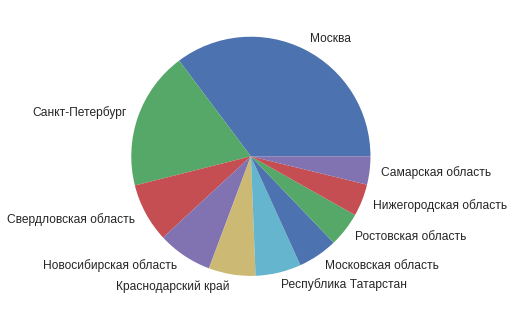

In [ ]:
plt.pie(regTop10.values,labels = regTop10.index)
plt.show()

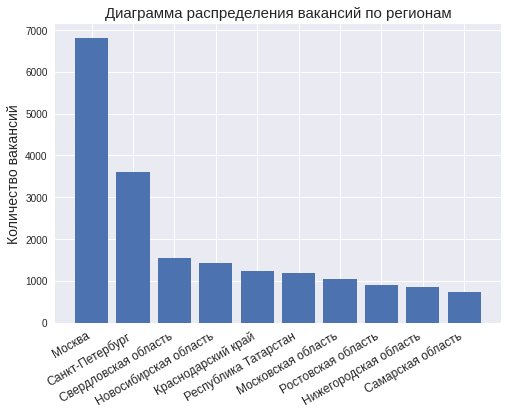

In [ ]:
plt.bar(regTop10.index,regTop10.values)
plt.ylabel('Количество вакансий')
plt.title('Диаграмма распределения вакансий по регионам')
plt.xticks(rotation=30, ha = 'right')
plt.show()

In [ ]:
Exp = dataA['experience_shot'].value_counts()

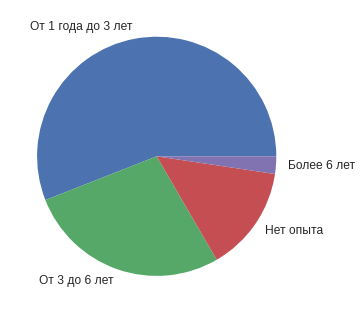

In [ ]:
plt.pie(Exp.values,labels = Exp.index)
plt.show()

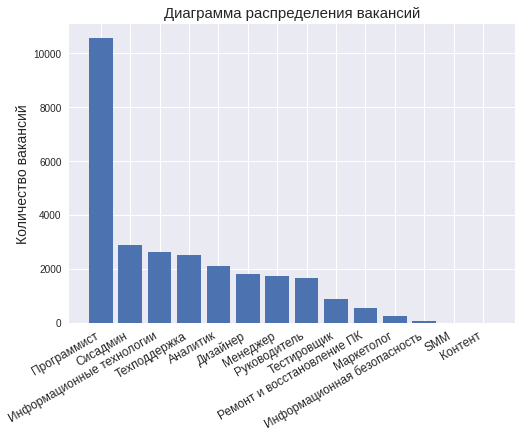

In [ ]:
vac = dataA['name2'][dataA['name2']!='другое'].value_counts()
plt.bar(vac.index,vac.values)
plt.ylabel('Количество вакансий')
plt.title('Диаграмма распределения вакансий')
plt.xticks(rotation=30, ha = 'right')
plt.show()

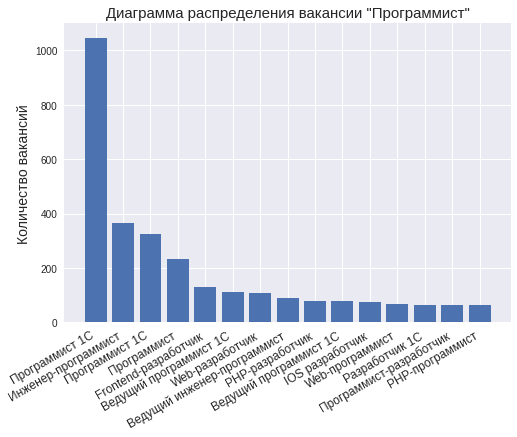

In [ ]:
vacPr = dataA['name'][dataA['name2']=='Программист'].value_counts()[:15]
plt.bar(vacPr.index,vacPr.values)
plt.ylabel('Количество вакансий')
plt.title('Диаграмма распределения вакансии "Программист"')
plt.xticks(rotation=30, ha = 'right')
plt.show()

In [ ]:
Sp = Specialnosty.sort_values(by='Частота_упоминания', ascending=False)

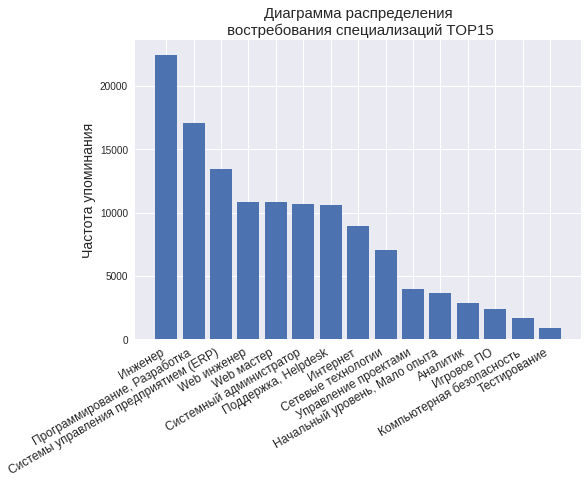

In [ ]:
plt.bar(Sp.Специализация[:15],Sp.Частота_упоминания[:15])
plt.ylabel('Частота упоминания')
plt.title('Диаграмма распределения\n востребования специализаций TOP15')
plt.xticks(rotation=30, ha = 'right')
plt.show()

In [ ]:
SpSet = dataA.specializations_list.value_counts()

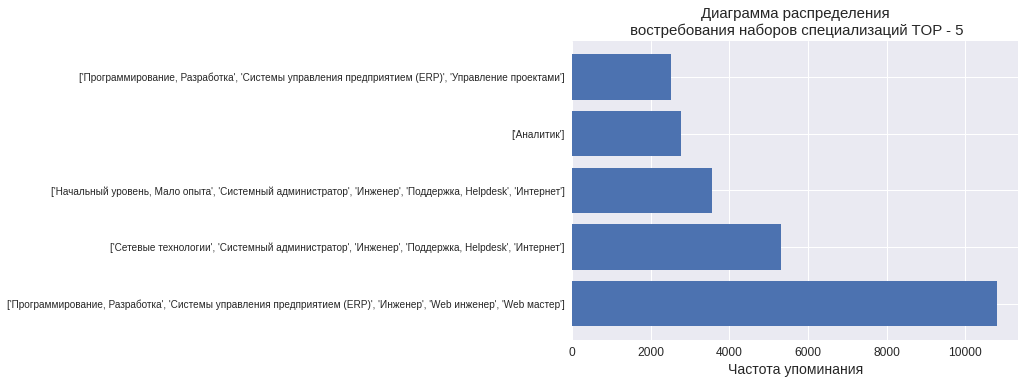

In [ ]:
plt.barh(SpSet.index[:5],SpSet.values[:5])
plt.xlabel('Частота упоминания')
plt.title('Диаграмма распределения\n востребования наборов специализаций TOP - 5')
#plt.xticks(rotation=90, ha = 'right')
plt.show()

In [ ]:
Sk = Skills.sort_values(by='Частота_упоминания', ascending=False)

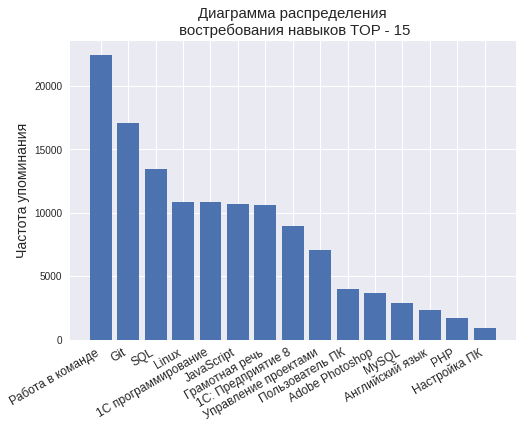

In [ ]:
plt.bar(Sk.Навыки[:15],Sp.Частота_упоминания[:15])
plt.ylabel('Частота упоминания')
plt.title('Диаграмма распределения\n востребования навыков TOP - 15')
plt.xticks(rotation=30, ha = 'right')
plt.show()

In [ ]:
SkillsSet = dataA.key_skills_list.value_counts()

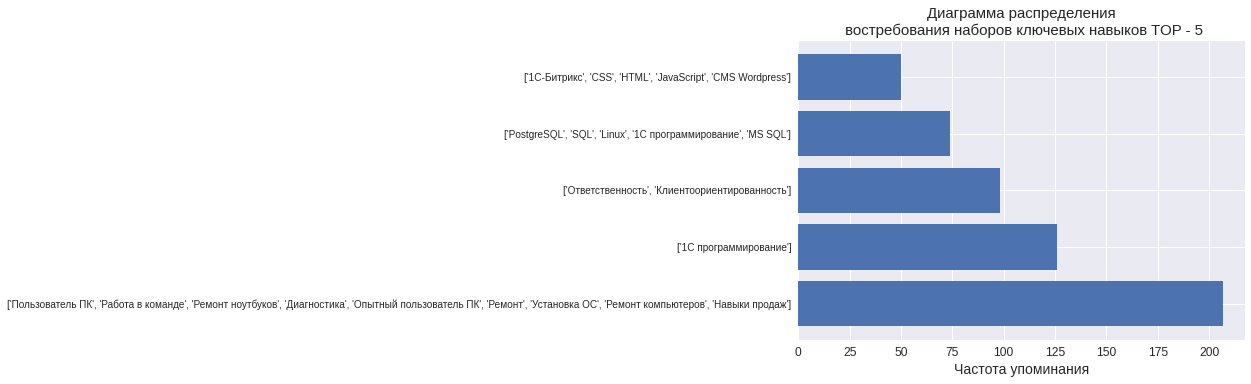

In [ ]:
plt.barh(SkillsSet.index[:5],SkillsSet.values[:5])
plt.xlabel('Частота упоминания')
plt.title('Диаграмма распределения\n востребования наборов ключевых навыков TOP - 5')
#plt.xticks(rotation=90, ha = 'right')
plt.show()

### Предварительные выводы

Графический анализ наглядно отображает выводы, полученные в результате неграфического анализа. В топ-15 специализаций вошли аналитик, игровое ПО, компьютерная безопасность и тестирование. В 15 ведущих IT-навыков   вошли такие, как AdobePhotoshop, MySQL, PHP И настройка ПК.

В датасете каждая вакансия обычно преполагает наличие целого набора специализаций: работодатели хотят принять в штат специалиста широкого профиля. Пятерку самых востребованных сетов специализаций возглавляет набор специализаций направленных на разработку и обслуживание сайтов: 'Программирование, Разработка', 'Системы управления предприятием (ERP)', 'Инженер', 'Web инженер', 'Web мастер'. Следующая по частоте упоминания связка отражает работу с сетями - 'Сетевые технологии', 'Системный администратор', 'Инженер', 'Поддержка, Helpdesk', 'Интернет'. На третьем месте совокупность для джунов -'Начальный уровень, Мало опыта', 'Системный администратор', 'Инженер', 'Поддержка, Helpdesk', 'Интернет'. Примечательно, что на четвертом месте расположена специализация аналитик в чистом виде, без посторонних примесей.

Та же картина и с ключевыми навыками. Здесь на первое место выходят навыки ремонта, настройки и обслуживания ПК: 'Пользователь ПК', 'Работа в команде', 'Ремонт ноутбуков', 'Диагностика', 'Опытный пользователь ПК', 'Ремонт', 'Установка ОС', 'Ремонт компьютеров', 'Навыки продаж'. Отдельную нишу занимает '1С программирование' - второй по частоте востребованности. На третьем месте скорее личностные качества -'Ответственность', 'Клиентоориентированность', а вот замыкают пятерку наборы базиста -'PostgreSQL', 'SQL', 'Linux', '1С программирование', 'MS SQL' и разработчика сайтов - '1С-Битрикс', 'CSS', 'HTML', 'JavaScript', 'CMS Wordpress'


# 6. Анализ взаимосвязей

### Оставим только вакансии с рублевыми зарплатами

In [ ]:
dataA.salary_currency.value_counts()

RUR    32737
USD        2
KZT        1
Name: salary_currency, dtype: int64

In [ ]:
dataA = dataA[dataA['salary_currency']=='RUR']

In [ ]:
dataA.index = np.arange(len(dataA))

In [ ]:
dataA.to_csv('/content/drive/MyDrive/tgu/очищенные.csv')

In [ ]:
dataA = pd.read_csv('/content/drive/MyDrive/tgu/очищенные.csv')

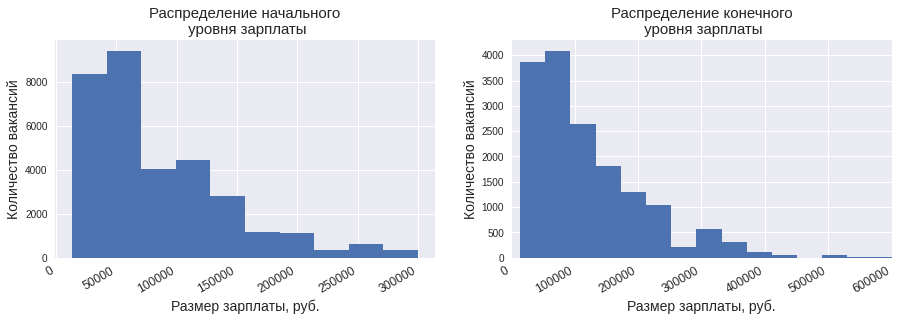

In [ ]:
# Посмотрим на зарплату До и После для последнего сохраненного датасета
salaryF = dataA.salary_from
salaryT = dataA.salary_to
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
ax1.hist(salaryF)
ax1.set_title('Распределение начального\n уровня зарплаты')
ax1.set_xlabel('Размер зарплаты, руб.')

ax1.set_ylabel('Количество вакансий')

ax2.hist(salaryT,bins=50)
ax2.set_title('Распределение конечного\n уровня зарплаты')
ax2.set_xlabel('Размер зарплаты, руб.')
ax2.set_xlim((0,600000))
ax2.set_ylabel('Количество вакансий')

for ax in (ax1, ax2):
  for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

### Связь зарплаты и даты

In [ ]:
salaryStatD = dataA.groupby('data').describe()
salaryStatD.salary_from = salaryStatD.salary_from.astype(int)
salaryStatD.salary_to = salaryStatD.salary_to.astype(int)
salaryStatDStack = salaryStatD.stack()
salaryStatDStack.sort_index(ascending=False)

Unnamed: 0  salary_from  salary_to
data                                                  
26.05.22   std     4473.165546        56753      92497
           min        0.000000        13160      14711
           mean    7747.000000        84681     122219
           max    15494.000000       300000    2000000
           count  15495.000000        15495       7552
           75%    11620.500000       110000     160000
           50%     7747.000000        70000      93000
           25%     3873.500000        40000      55000
16.06.2022 std     4977.481006        58722      88327
           min    15495.000000        13160      13890
           mean   24115.500000        86055     122000
           max    32736.000000       300000    1000000
           count  17242.000000        17242       8502
           75%    28425.750000       110000     160000
           50%    24115.500000        70000     100000
           25%    19805.250000        40000      55000

### Связь зарплаты и опыта

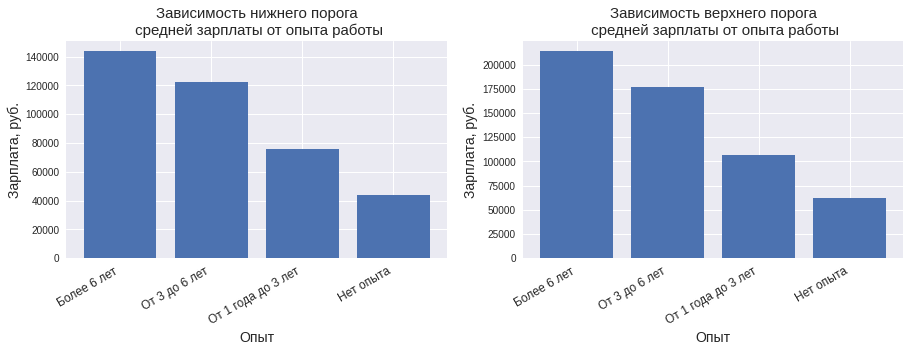

In [ ]:
ExpSal = dataA.groupby('experience_shot').salary_from.mean().astype(int).sort_values(ascending=False)
ExpSal2 = dataA.groupby('experience_shot').salary_to.mean().astype(int).sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
ax1.bar(ExpSal.index,ExpSal.values)
ax1.set_title('Зависимость нижнего порога\n средней зарплаты от опыта работы')
ax1.set_xlabel('Опыт')
ax1.set_ylabel('Зарплата, руб.')

ax2.bar(ExpSal.index,ExpSal2.values)
ax2.set_title('Зависимость верхнего порога\n средней зарплаты от опыта работы')
ax2.set_xlabel('Опыт')
ax2.set_ylabel('Зарплата, руб.')

for ax in (ax1, ax2):
  for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

### Зарплата по регионам

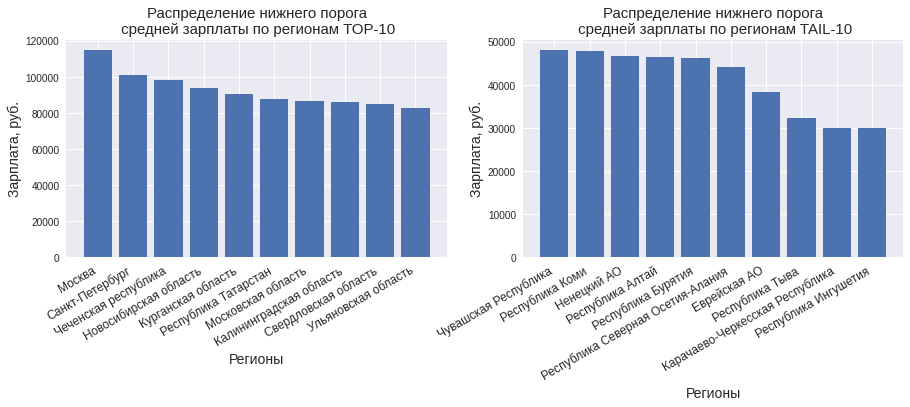

In [ ]:
RegSalTop =dataA.groupby('region').salary_from.mean().astype(int).sort_values(ascending=False)[:10]
RegSalThale = dataA.groupby('region').salary_from.mean().astype(int).sort_values(ascending=False)[-10:]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
ax1.bar(RegSalTop.index,RegSalTop.values)
ax1.set_title('Распределение нижнего порога\n средней зарплаты по регионам ТОР-10')
ax1.set_xlabel('Регионы')
ax1.set_ylabel('Зарплата, руб.')

ax2.bar(RegSalThale.index,RegSalThale.values)
ax2.set_title('Распределение нижнего порога\n средней зарплаты по регионам TAIL-10')
ax2.set_xlabel('Регионы')
ax2.set_ylabel('Зарплата, руб.')

for ax in (ax1, ax2):
  for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

### Зарплата по вакансиям

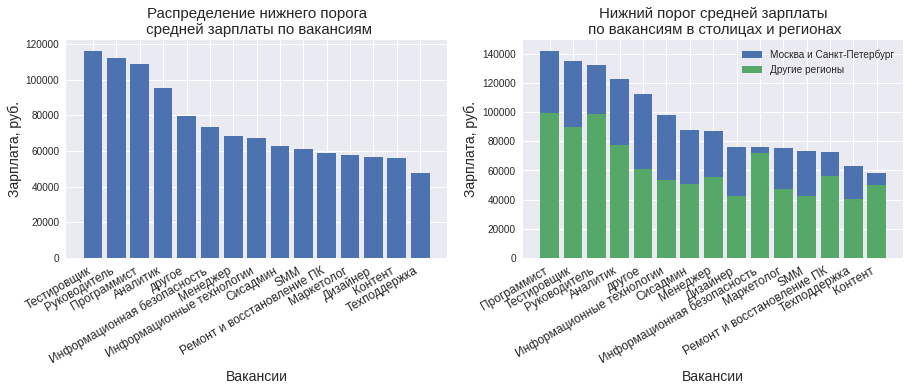

In [ ]:
VacSalTop = dataA.groupby('name2').salary_from.mean().astype(int).sort_values(ascending=False)
Capl = dataA[dataA['region'].isin(['Москва', 'Санкт-Петербург'])]
vacCap = Capl.groupby('name2').salary_from.mean().astype(int).sort_values(ascending=False)
Other = dataA[~(dataA['region'].isin(['Москва', 'Санкт-Петербург']))]
vacOther = Other.groupby('name2').salary_from.mean().astype(int).sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1.bar(VacSalTop.index,VacSalTop.values)
ax1.set_title('Распределение нижнего порога\n средней зарплаты по вакансиям')
ax1.set_xlabel('Вакансии')
ax1.set_ylabel('Зарплата, руб.')

ax2.bar(vacCap.index,vacCap.values,label='Москва и Санкт-Петербург')
ax2.bar(vacOther.index,vacOther.values,label='Другие регионы')
ax2.set_title('Нижний порог средней зарплаты\n по вакансиям в столицах и регионах')
ax2.set_xlabel('Вакансии')
ax2.set_ylabel('Зарплата, руб.')
ax2.legend()

for ax in (ax1, ax2):
  for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

### Связь зарплаты и специализации

In [ ]:
SpecSal10 = dataA.groupby(dataA.specializations_list).salary_from.min().astype(int).sort_values(ascending=False)[:10]

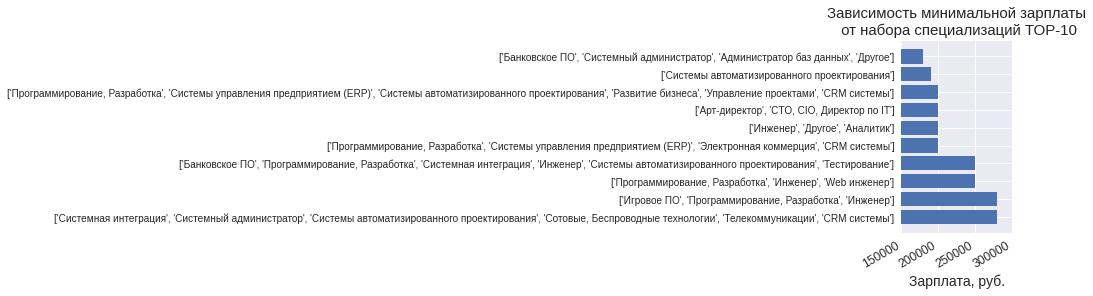

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,4), constrained_layout=True)
rects = ax1.barh(SpecSal10.index,SpecSal10.values)
ax1.set_xlim((150000,300000))
ax1.set_title('Зависимость минимальной зарплаты\n от набора специализаций ТОР-10')
ax1.set_xlabel('Зарплата, руб.')

for label in ax1.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

### Связь зарплаты и ключевых навыков

In [ ]:
# Отберем 30 наборов навыков, по которым нижний порог зарплаты максимален
SkillSal30 = dataA.groupby(dataA.key_skills_list).salary_from.min().sort_values(ascending=False).astype(int)[:30]

In [ ]:
# Установим опцию, чтобы текст в столбце не обрезался
pd.set_option('display.max_colwidth', None)

In [ ]:
# Переведем в датафрейм и выведем табличку
SkillsSalary  = SkillSal30.to_frame()
SkillsSalaryRnm = SkillsSalary.rename(columns={"salary_from":"Зарплата от, руб."})
SkillsSalaryRnm .rename_axis('Набор ключевых навыков').reset_index()

,Набор ключевых навыков,"Зарплата от, руб."
0,"['PostgreSQL', 'Spring Framework', 'REST', 'NoSQL', 'Web services', 'XML/JSON', 'Maven', 'Kubernaties', 'Git', 'GitFlow', 'Kafka', 'Design Patterns', 'RabbitMQ', 'Docker']",300000
1,"['CSS', 'JavaScript', 'Angular', 'TypeScript', 'HTML']",300000
2,"['Английский язык', 'Java', 'Linux', 'CSS', 'AngularJS', 'JavaScript', 'Git', 'Bootstrap', 'Разработка ПО', 'Angular']",300000
3,"['Английский язык', 'Contract Compliance Management', 'Business English', 'MS Outlook', 'AML', 'KYC', 'Compliance', 'Account Management', '5AMLD', 'Money Laundering Regulations', 'SAR', 'MLRO']",300000
4,"['SQL', 'ORACLE', 'Oracle DBA', 'Oracle Database']",300000
5,"['SQL', 'Oracle BI', 'Visiology']",300000
6,"['ITSM', 'Информационные технологии', 'Информационная безопасность', 'Управление проектами', 'Английский язык']",300000
7,"['SQL', 'Python', 'ETL', 'Spark']",300000
8,"['SQL', 'SCALA', 'Spark', 'Java', 'AWS']",300000
9,"['Английский язык', 'Adobe Photoshop', 'Графический дизайн', 'Cinema 4D', 'Adobe InDesign', 'Adobe After Effect']",300000


In [ ]:
# Определим самый длинный и самый короткий наборы навыков
lis =   SkillSal30.index.to_list()
maxk=0
mink=100
for k in lis:
  cnt = len(eval(k))
  if cnt >maxk:
    maxk = cnt
    kmax = k
  elif cnt < mink:
    mink = cnt
    kmin = k
print(maxk, 'навыков имеет набор', kmax)
print(mink, 'навыков имеет набор', kmin)


26 навыков имеет набор ['Linux', 'Python', 'Английский язык', 'Git', 'PostgreSQL', 'Redhat', 'Debian', 'Ansible', 'Puppet', 'Chef', 'VMware', 'Hyper-V', 'Red Hat', 'Linux KVM', 'AWS', 'Azure', 'Alibaba', 'GCP', 'Shell', 'Terraform', 'MySQL', 'ORACLE', 'MongoD', 'Apache', 'Nginx', 'Tomcat']
2 навыков имеет набор ['Управление проектами', 'web/мобильная разработка']


### Зарплата по вакансиям и опыту работы

In [ ]:
# Создадим сводную таблицу
pvt = pd.pivot_table(dataA, index = ['name2'],columns =['experience_shot'],aggfunc=[np.mean],values=['salary_from'],fill_value=0,margins=True,dropna=True)


In [ ]:
# Переименуем столбцы и переиндексируем для удобсва восприятия
pvtRnm = pvt.rename(columns={"mean":"", "salary_from":"Средняя зарплата","Более 6 лет":"(опыт более 6 лет)","Нет опыта":"(без опыта работы)","От 1 года до 3 лет":"(опыт от 1 года до 3 лет)","От 3 до 6 лет":"(опыт от 3  до 6 лет)", "All":"по вакансии"}).rename_axis('Вакансия')
pvtRnm.columns = [' '.join(col).strip() for col in pvtRnm.columns.values]
pvtRnm.reset_index(inplace=True)

In [ ]:
# Список столбцов с числовыми данными
numeric_columns = ['Средняя зарплата (опыт более 6 лет)',
       'Средняя зарплата (без опыта работы)',
       'Средняя зарплата (опыт от 1 года до 3 лет)',
       'Средняя зарплата (опыт от 3  до 6 лет)',
       'Средняя зарплата по вакансии']

In [ ]:
# Настроим стиль сводной таблицы
(pvtRnm
  .style
  .format('{:.0f}',subset=numeric_columns)# Округлим до целого
  .highlight_max(color='yellowgreen', subset=numeric_columns)# Наименьшие значения в столбце
  .highlight_min(color='coral', subset=numeric_columns))# Наимбольшие значения в столбце

,Вакансия,Средняя зарплата (опыт более 6 лет),Средняя зарплата (без опыта работы),Средняя зарплата (опыт от 1 года до 3 лет),Средняя зарплата (опыт от 3 до 6 лет),Средняя зарплата по вакансии
0,SMM,0,0,61000,0,61000
1,Аналитик,118131,43369,84586,144284,95390
2,Дизайнер,104583,39249,51403,76632,56674
3,Информационная безопасность,98400,40938,72890,80450,73675
4,Информационные технологии,138977,39896,60950,93405,67538
5,Контент,0,0,62500,50000,56250
6,Маркетолог,107500,40032,55826,69936,57765
7,Менеджер,126521,41152,64400,98695,68565
8,Программист,165234,52278,95327,143317,108712
9,Ремонт и восстановление ПК,90250,56149,61128,70294,58619


### Предварительные выводы

Итоговой датасет содержит записи от 26 мая 2022 года и от 16 июня 2022 года. Изучив группировку описательных статистик по этим данным, можно отметить, что в июне количество IT-вакансий выросло почти на 2 тысячи, появились вакансии с более высоким начальным уровнем зарплаты (видим рост среднего значения в столбце 'salary_from'), чаще стали указывать верхний порог зарплаты (количество выросло почти на тысячу), но макчимальное значение этого показателя сократилось вдвое. Квантили в июне в основном сохраняют майские значения.

Рассмотрев зависимость уровня зарплаты от опыта, видим вполне ожидаемую картину - более опытным соискателям работодатели готовы платить больше.

Более дорогие вакансии выпадают на столичные регионы: в Москве средняя стартовая зарплата превышают 115 тыс. рублей, В Санкт-Петербурге - 100 тыс. рублей. В десятку регионов с высооплачиваемыми вакансиями попали Чеченская республика, Новосибирская и Курганская области, Республика Татарстан, Московская, Калининградская, Свердловская и Ульяновская области. В десятку регионов  с самыми низкооплачиваемыми вакансиями вошли Чувашская Республика, Республика Коми, Ненецкий АО, Республики Алтай, Бурятия, Северная Осетия-Алания, Еврейская АО, Республика Тыва. Замыкают список Карачаево-Черкесская Республика и Республика Ингушетия  - там средние зарплаты составляют порядка 30000 рублей.

В целом по датасету самыми высокооплачиваемыми являются вакансии тетстировщиков, за ними следуют руководители, программисты и аналитики. В TOP-10 вошли вакансии 'Информационная безопасность' и'Информационные технологии', 'Системный администратор' и 'Ремонт и овосстановление ПК'. Замыкают первую десятку контент-менеджеры и специалисты техподдержки.

Если же посмотреть на средие зарплаты  вакансий  в разрезе на столичные и иные регионы, то на первое место выходит ваканисия программиста, причем разрыв в зарплате между столичными и иными регионами составляет около 40 тыс.рублей. В столицах тестировщики сохраняют вторую позицию по зарплатам, но в регионах они уступают руководителям. Наименьший разрыв в зарплатах между столицами и регионами можно отметить у вакансий 'Информационная безопасность' и 'контент-менеджеры'.

Самыми дорогостоящими в датасете являются следующие наборы специализаций - ('Системная интеграция', 'Системный администратор', 'Системы автоматизированного проектирования', 'Сотовые, Беспроводные технологии', 'Телекоммуникации', 'CRM системы') и ('Игровое ПО', 'Программирование, Разработка', 'Инженер') - минимальная начальная зарплата для таких наборов составляет от 280 тыс.рублей. Зарплату от 250 тыс. предлагают обладателям таких наборов специализаций как ('Программирование, Разработка', 'Инженер', 'Web инженер') и ('Банковское ПО', 'Программирование, Разработка', 'Системная интеграция', 'Инженер', 'Системы автоматизированного проектирования', 'Тестирование'). На зарплату от 200 тыс.рублей могут расчитывать претенденты, имеющие специализации ('Программирование, Разработка', 'Системы управления предприятием (ERP)', 'Электронная коммерция', 'CRM системы'), ('Инженер', 'Другое', 'Аналитик'),('Арт-директор', 'CTO, CIO, Директор по IT') и ('Программирование, Разработка', 'Системы управления предприятием (ERP)', 'Системы автоматизированного проектирования', 'Развитие бизнеса', 'Управление проектами', 'CRM системы'). Замыкают десятку самых высооплачиваемых такие наборы специализаций, как ('Системы автоматизированного проектирования') - от 190 тыс.рублей и ('Банковское ПО', 'Системный администратор', 'Администратор баз данных', 'Другое') - от 180 тыс.рублей.

Топ-30 самых дорогих наборов ключевых навыков характеризуются средним значением начальный зарплаты - 300 тыс.рулей. Полный перечень пердставлен  в  таблице https://colab.research.google.com/drive/1-hk67Xya5WxIOXUtjc1GvaM28Dlf8EX7#scrollTo=h-o2VaU1aBS1&line=1&uniqifier=1. Самый длинный из наборов содержит 26 навыков - 'Linux', 'Python', 'Английский язык', 'Git', 'PostgreSQL', 'Redhat', 'Debian', 'Ansible', 'Puppet', 'Chef', 'VMware', 'Hyper-V', 'Red Hat', 'Linux KVM', 'AWS', 'Azure', 'Alibaba', 'GCP', 'Shell', 'Terraform', 'MySQL', 'ORACLE', 'MongoD', 'Apache', 'Nginx', 'Tomcat', а самый короткий - только два: 'Управление проектами', 'web/мобильная разработка'.

Сводная таблица средих значений начального уровня зарплат в зависимости от вакансии и опыта работы подтвержает, что самые дорогие в преставленном датасете - вакансии тестировщиков. Даже не имеющие опыта работы соискатели этих вакансий могут расчитывать на зарплату выше 55 тыс.рублей. С увеличение опыта вакансия становится дороже, и для специалистов имеющих опыт работы в этой сфере больше 6 лет зарплату предлагают выше 220 тыс.рублей. Очень опытным и совсем неопытным вообще не предлагают вакансии контент-менеджеров и SMM-специалистов. Для соискателей без опыта самой высокоплачиваемой вакансией может стать вакансия руководителя - почти 80 тыс.рублей.




